In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('employee_churn.csv')

# 'department' 열의 결측치 삭제
if 'department' in data.columns:
    data = data.drop('department', axis=1)

# 'filed_complaint'과 'recently_promoted' 컬럼 데이터의 결측값을 0으로 채우기
data['filed_complaint'] = data['filed_complaint'].fillna(0)
data['recently_promoted'] = data['recently_promoted'].fillna(0)

# 'tenure'컬럼 데이터 근속 연수를 구하므로 결측값을 1으로 채우기
data['tenure'] = data['tenure'].fillna(1)

# 'last_evaluation', 'satisfaction' 결측치를 평균값으로 대체
data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())
data['satisfaction'] = data['satisfaction'].fillna(data['satisfaction'].mean())


# 카테고리별 이탈률 그래프

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14632\1757265107.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column_mapping[col], y= '퇴사 여부', data=data, palette='Set2', ci=None)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_14632\1757265107.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_mapping[col], y= '퇴사 여부', data=data, palette='Set2', ci=None)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_14632\1757265107.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column_mapping[col], y= '퇴사 여부', data=data, palette='Set2', ci=None)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_14632\1757265107.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

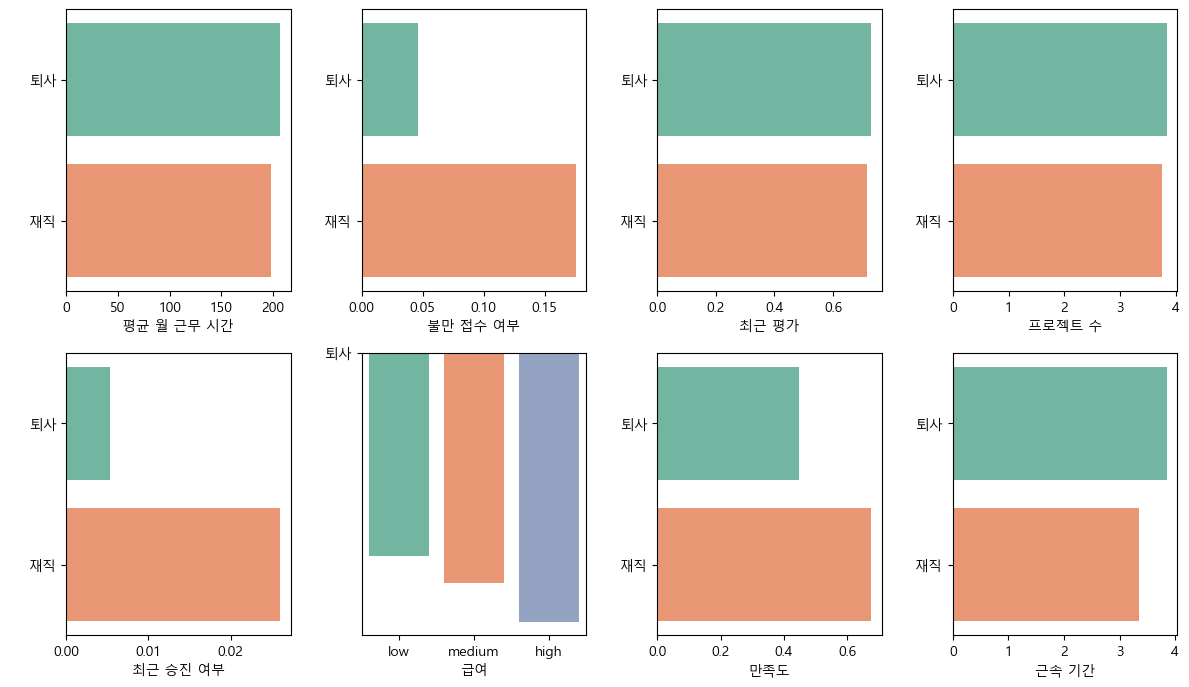

In [2]:
# 카테고리 변수 목록
categorical_columns = ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
                       'recently_promoted', 'salary', 'satisfaction', 'tenure']

# 컬럼 이름 매핑 (영어 -> 한국어)
column_mapping = {
    'avg_monthly_hrs': '평균 월 근무 시간',
    'filed_complaint': '불만 접수 여부',
    'last_evaluation': '최근 평가',
    'n_projects': '프로젝트 수',
    'recently_promoted': '최근 승진 여부',
    'salary': '급여',
    'satisfaction': '만족도',
    'tenure': '근속 기간',
    'status': '퇴사 여부'  
}

# 컬럼 이름 변경
data = data.rename(columns=column_mapping)
data['퇴사 여부'] = data['퇴사 여부'].replace({'Left': '퇴사', 'Employed': '재직'})

# 그래프
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)  
    sns.barplot(x=column_mapping[col], y= '퇴사 여부', data=data, palette='Set2', ci=None)
    plt.ylabel(" ")

plt.tight_layout()
plt.savefig('churn_rate_by_category.png', dpi=300, bbox_inches='tight') 
plt.show()

# 수치형 데이터별 이탈률 그래프

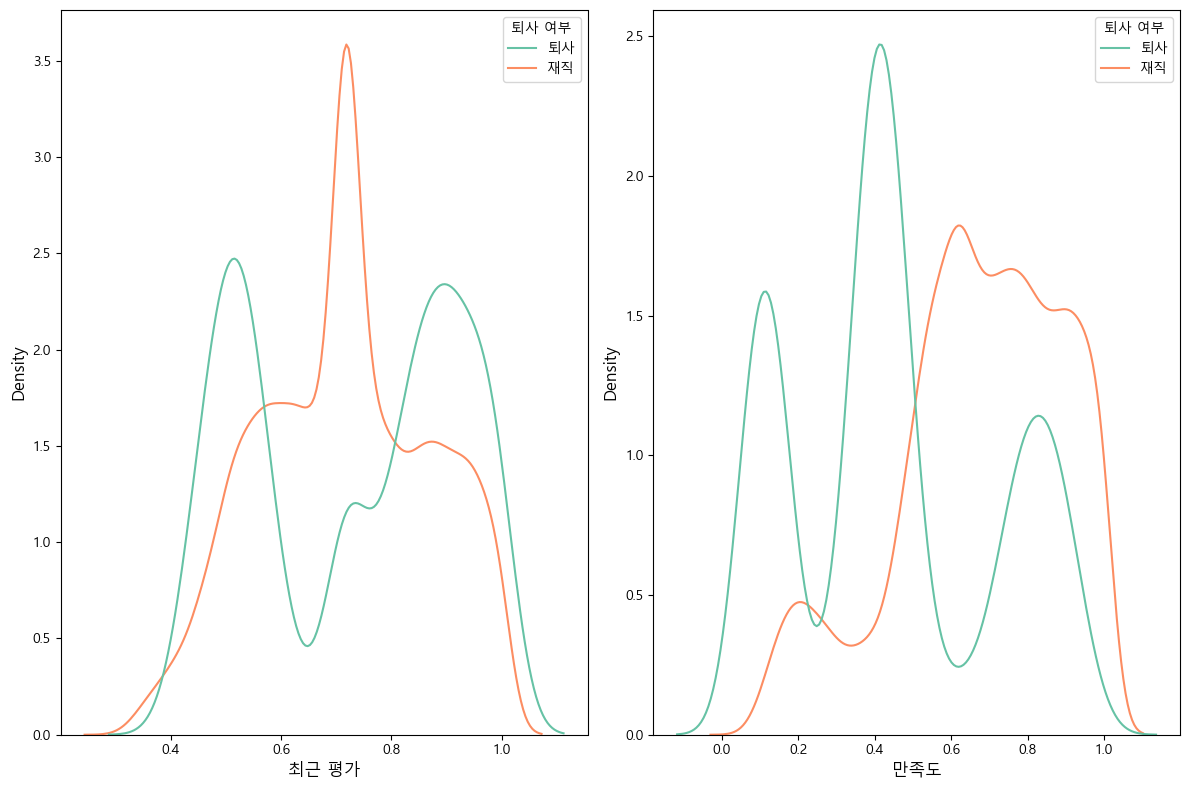

In [3]:
# 수치형 변수 목록
numeric_columns = ['last_evaluation', 'satisfaction']

# 컬럼 이름 매핑 (영어 -> 한국어)
column_mapping = {
    'last_evaluation': '최근 평가',
    'satisfaction': '만족도',
    'status': '퇴사 여부'
}

# 컬럼 이름 변경
data = data.rename(columns=column_mapping)
data['퇴사 여부'] = data['퇴사 여부'].replace({'Left': '퇴사', 'Employed': '재직'})

# 수치형 변수에 대해 반복하여 KDE 플롯 그리기

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(
        data=data,
        x=column_mapping[col],
        hue='퇴사 여부',        
        palette='Set2',           
        common_norm=False
    )
    plt.xlabel(column_mapping[col], fontsize=12)
    plt.ylabel('Density', fontsize=12)


plt.tight_layout()
plt.savefig('churn_rate_by_numeric.png', dpi=300, bbox_inches='tight') 
plt.show()
